In [1]:
import scanpy.api as sc

/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

The objects can be downloaded from [ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/MouseAtlas.zip](ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/MouseAtlas.zip)

Harmony was ran analogously to what was done in the pancreas demonstration notebook.

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R

library(harmony)

/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: Rcpp

  warnings.warn(x, RRuntimeWarning)


In [5]:
adata = sc.read('MouseAtlas.subset.h5ad')

In [6]:
pca = adata.obsm['X_pca']
batch = adata.obs['sample']

In [7]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

t1 = Sys.time()
hem <- HarmonyMatrix(pca, batch, theta=4)
t2 = Sys.time()

hem = data.frame(hem)

t2-t1

/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Harmony 1/10

  warnings.warn(x, RRuntimeWarning)
/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 0%   10   20   30   40   50   60   70   80   90   100%

  warnings.warn(x, RRuntimeWarning)
/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: [----|----|----|----|----|----|----|----|----|----|

  warnings.warn(x, RRuntimeWarning)
/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: *
  warnings.warn(x, RRuntimeWarning)
/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: |

  warnings.warn(x, RRuntimeWarning)
/Users/kp9/anaconda3/envs/orig/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Harmony 2/10

  warnings.warn(x, RRunt

Clustered for 134 iterations
Clustered for 112 iterations
Clustered for 99 iterations
Clustered for 93 iterations
Clustered for 93 iterations
Clustered for 87 iterations
Clustered for 90 iterations
Clustered for 86 iterations
Time difference of 19.38482 mins


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:36.10) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing UMAP
    finished (0:02:11.17) --> added
    'X_umap', UMAP coordinates (adata.obsm)


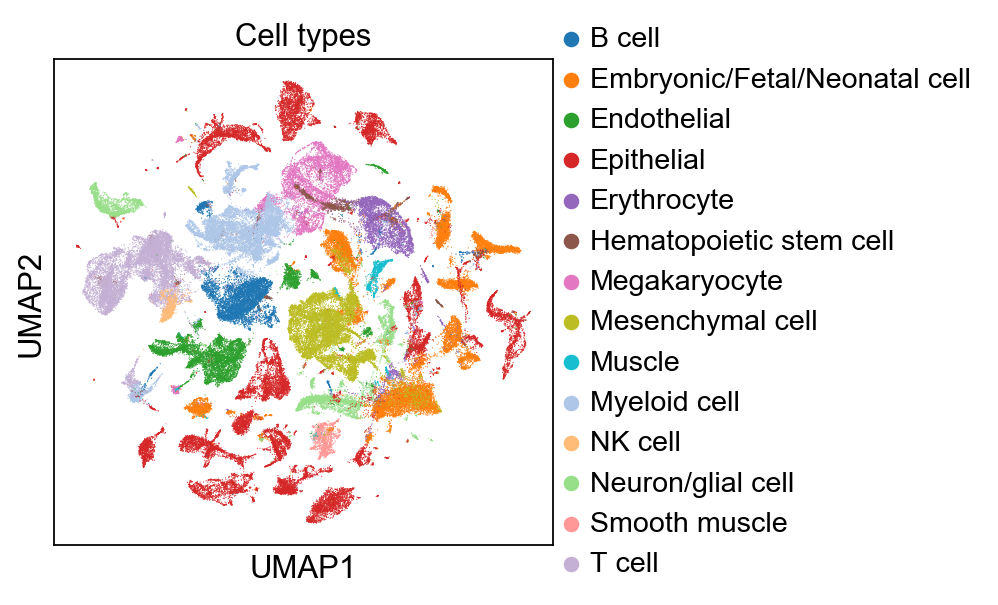

In [8]:
sc.settings.verbosity = 3

adata.obsm['X_pca'] = hem.values
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color='Cell types')

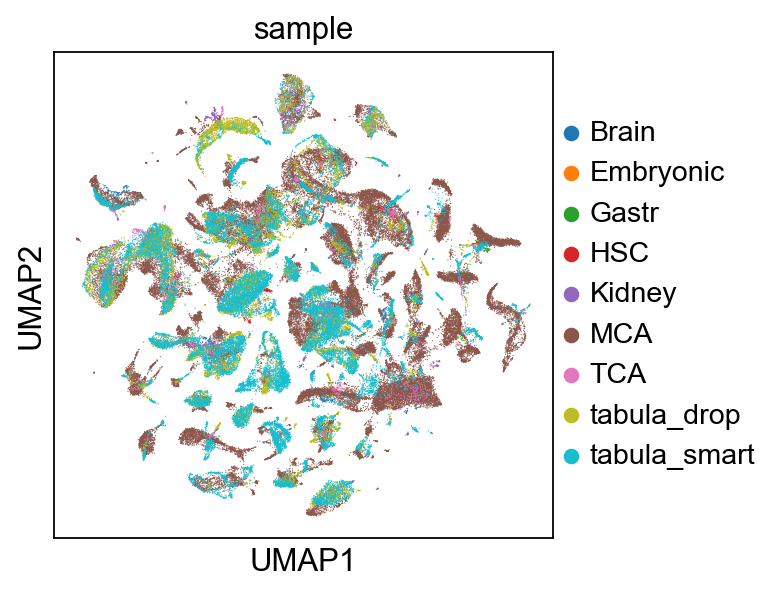

In [9]:
sc.pl.umap(adata, color='sample')